<a href="https://colab.research.google.com/github/ECHOIgOng/229351_660510593/blob/main/229351_LAB08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 8

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด
3. ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [76]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-11 02:46:20--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.003s  

2025-09-11 02:46:20 (49.7 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [77]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

In [78]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],

                                  index_col='Date',
                                        date_parser=parser)

data.tail()

/tmp/ipython-input-1422672586.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],


,MaxTemp
Date,
2019-07-27,26.2
2019-07-28,34.2
2019-07-29,34.4
2019-07-30,33.5
2019-07-31,30.7


ข้อมูลที่ได้เป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วย method `resample`

In [79]:
data_monthly = data['MaxTemp'].resample("M").mean()

/tmp/ipython-input-4072725978.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['MaxTemp'].resample("M").mean()


In [80]:
data_monthly_Trainingset = data_monthly.loc['1998-01-31':'2017-07-31']
data_monthly_Testset = data_monthly.loc['2017-08-31':]

In [88]:
es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'additive', damped=True, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_additive_True_None = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'additive', damped=True, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_additive_True_add = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'additive', damped=True, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_additive_True_mul = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'additive', damped=False, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_additive_False_None = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'additive', damped=False, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_additive_False_add = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'additive', damped=False, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_additive_False_mul = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'add', damped=True, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_add_True_None = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'add', damped=True, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_add_True_add = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'add', damped=True, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_add_True_mul = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'add', damped=False, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_add_False_None = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'add', damped=False, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_add_False_add = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'add', damped=False, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_add_False_mul = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'mul', damped=True, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_mul_True_None = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'mul', damped=True, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_mul_True_add = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'mul', damped=True, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_mul_True_mul = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'mul', damped=False, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_mul_False_None = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'mul', damped=False, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_mul_False_add = es_fit.predict('2017-08-31','2019-07-31')

es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'mul', damped=False, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat_mul_False_mul = es_fit.predict('2017-08-31','2019-07-31')

/tmp/ipython-input-888904078.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'additive', damped=True, seasonal=None, seasonal_periods=12)
/tmp/ipython-input-888904078.py:5: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'additive', damped=True, seasonal='add', seasonal_periods=12)
/tmp/ipython-input-888904078.py:9: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'additive', damped=True, seasonal='mul', seasonal_periods=12)
/tmp/ipython-input-888904078.py:13: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(data_monthly_Trainingset, trend = 'additive', damped=False, seasonal=None, seasonal_periods=12)
/tmp/ipython-input-888904078.py:17: FutureWarnin

In [82]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [91]:
print('RMSE_yhat_additive_True_None:',rmse(data_monthly_Testset,yhat_additive_True_None))
print('RMSE_yhat_additive_True_add:',rmse(data_monthly_Testset,yhat_additive_True_add))
print('RMSE_yhat_additive_True_mul:',rmse(data_monthly_Testset,yhat_additive_True_mul))

print('RMSE_yhat_additive_True_None:',rmse(data_monthly_Testset,yhat_additive_False_None))
print('RMSE_yhat_additive_True_add:',rmse(data_monthly_Testset,yhat_additive_False_add))
print('RMSE_yhat_additive_True_mul:',rmse(data_monthly_Testset,yhat_additive_False_mul))

print('RMSE_yhat_add_True_None:',rmse(data_monthly_Testset,yhat_add_True_None))
print('RMSE_yhat_add_True_add:',rmse(data_monthly_Testset,yhat_add_True_add))
print('RMSE_yhat_add_True_mul:',rmse(data_monthly_Testset,yhat_add_True_mul))

print('RMSE_yhat_add_True_None:',rmse(data_monthly_Testset,yhat_add_False_None))
print('RMSE_yhat_add_True_add:',rmse(data_monthly_Testset,yhat_add_False_add))
print('RMSE_yhat_add_True_mul:',rmse(data_monthly_Testset,yhat_add_False_mul))

print('RMSE_yhat_mul_True_None:',rmse(data_monthly_Testset,yhat_mul_True_None))
print('RMSE_yhat_mul_True_add:',rmse(data_monthly_Testset,yhat_mul_True_add))
print('RMSE_yhat_mul_True_mul:',rmse(data_monthly_Testset,yhat_mul_True_mul))

print('RMSE_yhat_mul_True_None:',rmse(data_monthly_Testset,yhat_mul_False_None))
print('RMSE_yhat_mul_True_add:',rmse(data_monthly_Testset,yhat_mul_False_add))
print('RMSE_yhat_mul_True_mul:',rmse(data_monthly_Testset,yhat_mul_False_mul))

RMSE_yhat_additive_True_None: 2.7206000811236914
RMSE_yhat_additive_True_add: 1.1134955121933203
RMSE_yhat_additive_True_mul: 1.1062443526370112
RMSE_yhat_additive_True_None: 2.697261490836458
RMSE_yhat_additive_True_add: 1.1669523392712184
RMSE_yhat_additive_True_mul: 1.1639766564724707
RMSE_yhat_add_True_None: 2.7206000811236914
RMSE_yhat_add_True_add: 1.1134955121933203
RMSE_yhat_add_True_mul: 1.1062443526370112
RMSE_yhat_add_True_None: 2.697261490836458
RMSE_yhat_add_True_add: 1.1669523392712184
RMSE_yhat_add_True_mul: 1.1639766564724707
RMSE_yhat_mul_True_None: 2.7206000811236675
RMSE_yhat_mul_True_add: 0.8958522762071295
RMSE_yhat_mul_True_mul: 1.10643357265325
RMSE_yhat_mul_True_None: 3.2472538878024
RMSE_yhat_mul_True_add: 1.1875960299599877
RMSE_yhat_mul_True_mul: 1.182446316454671


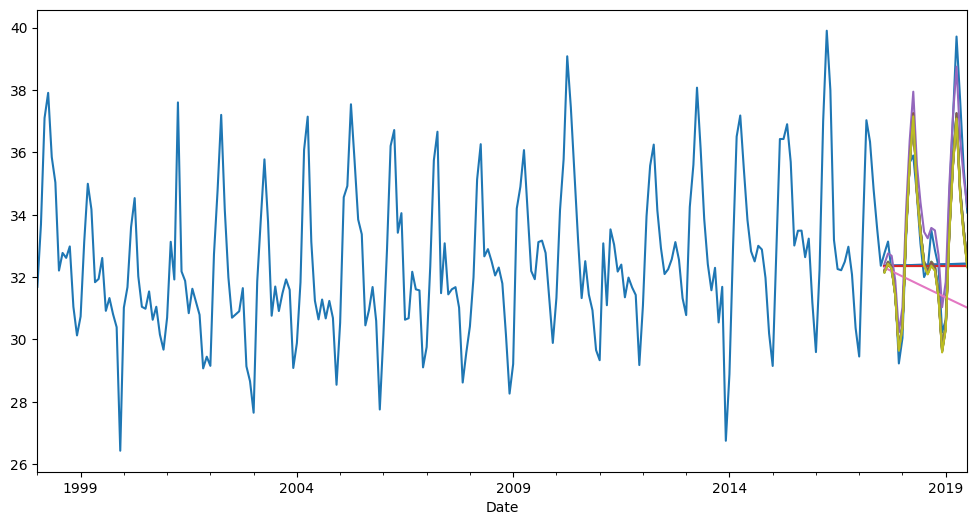

In [90]:
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat_additive_True_None.plot()
yhat_additive_True_add.plot()
yhat_additive_True_mul.plot()
yhat_additive_False_None.plot()
yhat_additive_False_add.plot()
yhat_additive_False_mul.plot()
yhat_add_True_None.plot()
yhat_add_True_add.plot()
yhat_add_True_mul.plot()
yhat_add_False_None.plot()
yhat_add_False_add.plot()
yhat_add_False_mul.plot()
yhat_mul_True_None.plot()
yhat_mul_True_add.plot()
yhat_mul_True_mul.plot()
yhat_mul_False_None.plot()
yhat_mul_False_add.plot()
yhat_mul_False_mul.plot();

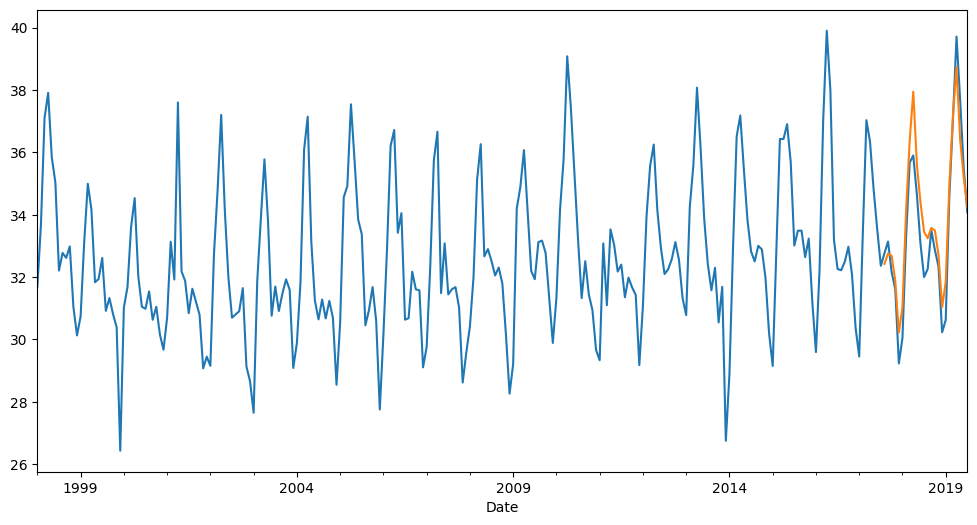

In [92]:
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat_mul_True_add.plot();

In [ ]:
#yhat_mul_True_add มีค่า rmse น้อยที่สุด